In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 전처리

## 1. 데이터 불러오기 및 구조 확인

In [7]:
df = pd.read_csv('./Wine Data/wine_total_data_0723_cleansed.csv', index_col= 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          13416 non-null  float64
 1   Latitude           13416 non-null  float64
 2   Soil Mapping Unit  13416 non-null  int64  
 3   Continent          13416 non-null  object 
 4   Country            13416 non-null  object 
 5   Region Lv1         13354 non-null  object 
 6   Grape_Variety      13416 non-null  float64
 7   SHARE_x            13416 non-null  int64  
 8   WRB4_x             13416 non-null  object 
 9   KOPPEN             13416 non-null  object 
 10  TEXTURE_USDA_x     13416 non-null  float64
 11  REF_BULK_DENSITY   13416 non-null  float64
 12  BULK_DENSITY       13416 non-null  float64
 13  DRAINAGE_x         13416 non-null  object 
 14  ROOT_DEPTH_x       13416 non-null  int64  
 15  AWC_x              13416 non-null  int64  
 16  HWSD2_SMU_ID_y     13416 no

In [9]:
# 현재의 온도는 K 기준으로 되어 있어서 섭씨로 변경해줌
df['TG'] = df['TG'] - 273
df['TN'] = df['TN'] - 273
df['TX'] = df['TX'] - 273

In [10]:
df.head()

,Longitude,Latitude,Soil Mapping Unit,Continent,Country,Region Lv1,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,...,TG,TN,TX,RR,RR1,Year,lat_round,lon_round,lat_int,lon_int
0,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,1.0,60,FLeu,B,...,17.671964,5.31567,30.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63
1,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,1.0,60,FLeu,B,...,17.655011,5.43283,30.47107,15.902047,1.428571,2021,-41.0,-63.0,-40,-63
2,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,1.0,60,FLeu,B,...,18.058975,5.14188,31.67847,13.090754,1.285714,2021,-40.0,-64.0,-40,-63
3,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,1.0,60,FLeu,B,...,17.893624,5.20532,31.39062,17.103797,1.500000,2021,-40.0,-63.0,-40,-63
4,-63.358333,-40.775000,12245,Americas,Argentina,Río Negro Province,1.0,60,FLeu,B,...,17.671964,5.31567,30.50006,14.568954,1.333333,2021,-41.0,-64.0,-40,-63


In [12]:
df.columns

Index(['Longitude', 'Latitude', 'Soil Mapping Unit', 'Continent', 'Country',
       'Region Lv1', 'Grape_Variety', 'SHARE_x', 'WRB4_x', 'KOPPEN',
       'TEXTURE_USDA_x', 'REF_BULK_DENSITY', 'BULK_DENSITY', 'DRAINAGE_x',
       'ROOT_DEPTH_x', 'AWC_x', 'HWSD2_SMU_ID_y', 'SEQUENCE', 'SHARE_y',
       'WRB4_y', 'ROOT_DEPTH_y', 'DRAINAGE_y', 'AWC_y', 'COARSE', 'SAND',
       'SILT', 'CLAY', 'TEXTURE_USDA_y', 'TEXTURE_SOTER', 'BULK', 'REF_BULK',
       'ORG_CARBON', 'PH_WATER', 'TOTAL_N', 'CN_RATIO', 'CEC_SOIL', 'CEC_CLAY',
       'CEC_EFF', 'TEB', 'BSAT', 'ALUM_SAT', 'ESP', 'TCARBON_EQ', 'GYPSUM',
       'ELEC_COND', 'Top12_Grape', 'LatRound', 'LngRound', 'LatInt', 'LngInt',
       'lat', 'lon', 'TG', 'TN', 'TX', 'RR', 'RR1', 'Year', 'lat_round',
       'lon_round', 'lat_int', 'lon_int'],
      dtype='object')

## 2. Feature Selection

In [13]:
# 삭제할 컬럼 확인
# 위치 정보: 'Longitude', 'Latitude', Region Lv1, Continent, Country, 'LatRound', 'LngRound', 'LatInt', 'LngInt', 'lat', 'lon', 'lat_round','lon_round', 'lat_int', 'lon_int'
# 토양 정보: Soil Mapping Unit, 
drop_cols = ['Longitude', 'Latitude', 'Region Lv1', 'Continent', 'Country', 'LatRound', 'LngRound', 'LatInt', 'LngInt', 'lat', 'lon', 'lat_round','lon_round', 'lat_int', 'lon_int', 'Soil Mapping Unit']
df = df.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grape_Variety     13416 non-null  float64
 1   SHARE_x           13416 non-null  int64  
 2   WRB4_x            13416 non-null  object 
 3   KOPPEN            13416 non-null  object 
 4   TEXTURE_USDA_x    13416 non-null  float64
 5   REF_BULK_DENSITY  13416 non-null  float64
 6   BULK_DENSITY      13416 non-null  float64
 7   DRAINAGE_x        13416 non-null  object 
 8   ROOT_DEPTH_x      13416 non-null  int64  
 9   AWC_x             13416 non-null  int64  
 10  HWSD2_SMU_ID_y    13416 non-null  int64  
 11  SEQUENCE          13416 non-null  int64  
 12  SHARE_y           13416 non-null  int64  
 13  WRB4_y            13416 non-null  object 
 14  ROOT_DEPTH_y      13416 non-null  float64
 15  DRAINAGE_y        13416 non-null  object 
 16  AWC_y             13416 non-null  float64
 17

이전에 아래 코드를 통해 이미 포도 맵핑 수행함
```python
grape_dic = {
    'malbec' : 1,
    'cabernet sauvignon' : 2,
    'pinot noir' : 3 ,
    'merlot' : 4,
    'grenache' : 5,
    'syrah' : 6,
    'cabernet franc' :7,
    'tempranillo' : 8,
    'nebbiolo' : 9,
    'sangiovese' : 10,
    'montepulciano' : 11,
    'zinfandel' : 12
}

df['Grape_Variety']=df.loc[df['Top12_Grape'] == 1]['Grape_Variety'].map(grape_dic)
df.loc[df['Grape_Variety'].isnull(),'Grape_Variety'] = 0
df['Grape_Variety'].value_counts()
```

In [14]:
df['Grape_Variety'].value_counts()

Grape_Variety
0.0     4315
6.0     1864
2.0     1650
3.0     1469
4.0     1075
5.0      780
7.0      518
10.0     437
1.0      436
9.0      372
8.0      330
11.0     108
12.0      62
Name: count, dtype: int64

In [15]:
# Top12_Grape, Year 삭제
df.drop(columns = ['Top12_Grape', 'Year'], inplace = True)

In [19]:
df['SEQUENCE'].value_counts()

SEQUENCE
1    13416
Name: count, dtype: int64

In [20]:
df.drop('SEQUENCE', axis = 1, inplace= True)

In [21]:
df.drop('HWSD2_SMU_ID_y',axis=1,inplace=True)

In [22]:
# REF_BULK_DENSITY & BULK_DENSITY는 BULK와 상관계수 1으로 삭제
df.drop(['REF_BULK_DENSITY','BULK_DENSITY'],axis=1,inplace=True) 

# DRAINAGE_x , DRAINAGE_y 과 WRB4_x, WRB4_y 과 TEXTURE_USDA_X,TEXTURE_USDA_y 은 값이 동일한 컬럼으로 둘중 한개 제외
df.drop(['SHARE_y', 'ROOT_DEPTH_y', 'AWC_y'],axis=1,inplace=True) 


In [23]:
df.drop(['WRB4_y','DRAINAGE_y'],axis=1,inplace=True)
df.drop('TEXTURE_USDA_y',axis=1,inplace=True)

In [24]:
df.head()

,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,TEXTURE_USDA_x,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,...,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1
0,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333
1,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0,4,2.0,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571
2,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0,4,2.0,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714
3,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0,4,2.0,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000
4,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0,4,2.0,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Grape_Variety   13416 non-null  float64
 1   SHARE_x         13416 non-null  int64  
 2   WRB4_x          13416 non-null  object 
 3   KOPPEN          13416 non-null  object 
 4   TEXTURE_USDA_x  13416 non-null  float64
 5   DRAINAGE_x      13416 non-null  object 
 6   ROOT_DEPTH_x    13416 non-null  int64  
 7   AWC_x           13416 non-null  int64  
 8   COARSE          13416 non-null  int64  
 9   SAND            13416 non-null  int64  
 10  SILT            13416 non-null  int64  
 11  CLAY            13416 non-null  int64  
 12  TEXTURE_SOTER   13416 non-null  object 
 13  BULK            13416 non-null  float64
 14  REF_BULK        13416 non-null  float64
 15  ORG_CARBON      13416 non-null  float64
 16  PH_WATER        13416 non-null  float64
 17  TOTAL_N         13416 non-null  floa

## 3. One-hot Encoding

- 미래 예측 데이터도 현재와 동일한 토양 데이터를 가지고 있으니, get_dummies() 사용해도 됨!
- 기후 데이터의 경우, 예측 데이터도 함께 스케일러 적용해주어야 함

In [27]:
df.select_dtypes('object').head()

,WRB4_x,KOPPEN,DRAINAGE_x,TEXTURE_SOTER
0,FLeu,B,MW,M
1,FLeu,B,MW,M
2,FLeu,B,MW,M
3,FLeu,B,MW,M
4,FLeu,B,MW,M


In [28]:
df = pd.get_dummies(df, columns = ['TEXTURE_SOTER'], prefix = 'TEXTURE_SOTER', dtype = int)
df

,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,TEXTURE_USDA_x,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,...,GYPSUM,ELEC_COND,TG,TN,TX,RR,RR1,TEXTURE_SOTER_C,TEXTURE_SOTER_F,TEXTURE_SOTER_M
0,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,0,0,1
1,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0.7,2,17.655011,5.43283,30.47107,15.902047,1.428571,0,0,1
2,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0.7,2,18.058975,5.14188,31.67847,13.090754,1.285714,0,0,1
3,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0.7,2,17.893624,5.20532,31.39062,17.103797,1.500000,0,0,1
4,1.0,60,FLeu,B,11.0,MW,1,142,3,55,...,0.7,2,17.671964,5.31567,30.50006,14.568954,1.333333,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,0.0,60,CHha,D,9.0,MW,1,139,15,33,...,0.8,1,15.641716,-1.65527,28.28100,27.442335,4.714286,0,0,1
13818,0.0,50,PHcc,D,9.0,MW,1,167,3,40,...,0.2,0,16.334150,-2.12354,28.29350,24.005887,4.214286,0,0,1
13819,0.0,50,PHcc,D,9.0,MW,1,167,3,40,...,0.2,0,16.495897,-1.83030,28.07513,22.787967,4.261905,0,0,1
13820,0.0,50,PHcc,D,9.0,MW,1,167,3,40,...,0.2,0,16.209322,-2.11722,28.52680,22.684277,4.404762,0,0,1


In [30]:
df = pd.get_dummies(df, columns=['WRB4_x'], prefix='WRB4',dtype=int)
df

,Grape_Variety,SHARE_x,KOPPEN,TEXTURE_USDA_x,DRAINAGE_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,...,WRB4_RTdy,WRB4_RTeu,WRB4_SCha,WRB4_SNha,WRB4_STrt,WRB4_UMac,WRB4_UMcm,WRB4_VR,WRB4_VRcc,WRB4_VRha
0,1.0,60,B,11.0,MW,1,142,3,55,27,...,0,0,0,0,0,0,0,0,0,0
1,1.0,60,B,11.0,MW,1,142,3,55,27,...,0,0,0,0,0,0,0,0,0,0
2,1.0,60,B,11.0,MW,1,142,3,55,27,...,0,0,0,0,0,0,0,0,0,0
3,1.0,60,B,11.0,MW,1,142,3,55,27,...,0,0,0,0,0,0,0,0,0,0
4,1.0,60,B,11.0,MW,1,142,3,55,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13817,0.0,60,D,9.0,MW,1,139,15,33,44,...,0,0,0,0,0,0,0,0,0,0
13818,0.0,50,D,9.0,MW,1,167,3,40,34,...,0,0,0,0,0,0,0,0,0,0
13819,0.0,50,D,9.0,MW,1,167,3,40,34,...,0,0,0,0,0,0,0,0,0,0
13820,0.0,50,D,9.0,MW,1,167,3,40,34,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df = pd.get_dummies(df, columns=['DRAINAGE_x'], prefix='DRAINAGE',dtype=int)
df.head()

,Grape_Variety,SHARE_x,KOPPEN,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,...,WRB4_UMac,WRB4_UMcm,WRB4_VR,WRB4_VRcc,WRB4_VRha,DRAINAGE_I,DRAINAGE_MW,DRAINAGE_P,DRAINAGE_SE,DRAINAGE_VP
0,1.0,60,B,11.0,1,142,3,55,27,18,...,0,0,0,0,0,0,1,0,0,0
1,1.0,60,B,11.0,1,142,3,55,27,18,...,0,0,0,0,0,0,1,0,0,0
2,1.0,60,B,11.0,1,142,3,55,27,18,...,0,0,0,0,0,0,1,0,0,0
3,1.0,60,B,11.0,1,142,3,55,27,18,...,0,0,0,0,0,0,1,0,0,0
4,1.0,60,B,11.0,1,142,3,55,27,18,...,0,0,0,0,0,0,1,0,0,0


In [32]:
df = pd.get_dummies(df, columns=['KOPPEN'], prefix='KOPPEN',dtype=int)
df.head()

,Grape_Variety,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,...,DRAINAGE_I,DRAINAGE_MW,DRAINAGE_P,DRAINAGE_SE,DRAINAGE_VP,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E
0,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
1,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
2,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
3,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
4,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0


In [33]:
df.to_csv('./Project_data/ML_data_total.csv')

# Modeling

## 1차 시도: raw_data

In [35]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00a 0:00:01


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

In [37]:
df.rename({'Grape_Variety': 'target'}, axis = 1, inplace = True)
df.head()

,target,SHARE_x,TEXTURE_USDA_x,ROOT_DEPTH_x,AWC_x,COARSE,SAND,SILT,CLAY,BULK,...,DRAINAGE_I,DRAINAGE_MW,DRAINAGE_P,DRAINAGE_SE,DRAINAGE_VP,KOPPEN_A,KOPPEN_B,KOPPEN_C,KOPPEN_D,KOPPEN_E
0,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
1,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
2,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
3,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0
4,1.0,60,11.0,1,142,3,55,27,18,1.5,...,0,1,0,0,0,0,1,0,0,0


In [38]:
x = df.drop('target', axis = 1)
y = df['target']

In [39]:
x.shape, y.shape

((13416, 106), (13416,))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 20, shuffle= True)

In [41]:
X_train.shape, y_train.shape

((10732, 106), (10732,))

In [42]:
X_test.shape, y_test.shape

((2684, 106), (2684,))

### 1. 로지스틱 분류

In [43]:
# 스케일링 안한 버전
lg = LogisticRegression(solver = 'liblinear', random_state= 20)
lg.fit(X_train, y_train)

LogisticRegression(random_state=20, solver='liblinear')

In [44]:
y_pred_train = lg.predict_proba(X_train)
y_pred = lg.predict_proba(X_test)

In [45]:
lg.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [46]:
lg.coef_

array([[-1.05472938e-02,  2.76673300e-01,  2.36834263e+00, ...,
         7.12667433e-01,  8.29563130e-01, -1.29487157e+00],
       [-6.55960426e-03, -7.68586172e-02, -2.93817859e+00, ...,
        -2.30492915e-01, -9.77189554e-01, -8.51795055e-01],
       [ 8.50981072e-03, -3.16111387e-02, -9.61310483e-01, ...,
        -3.25413226e-01,  1.41380949e-01,  5.00347730e-01],
       ...,
       [-1.73058631e-02, -7.75583711e-02, -5.29454738e+00, ...,
         1.63944967e+00, -9.43915216e-01, -1.71576067e-02],
       [-3.27501200e-02, -3.19353559e-01, -1.13644822e+00, ...,
         3.58796804e-01, -2.87757026e-02, -7.54154027e-02],
       [ 4.42182338e-02, -6.76119005e-01, -1.74999325e-01, ...,
        -2.32701947e-02, -1.58655714e-01, -1.18461282e-05]])

In [53]:
result = pd.DataFrame(np.round(y_pred_train, decimals = 3), columns = lg.classes_)
result

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,0.205,0.001,0.055,0.131,0.049,0.001,0.079,0.018,0.004,0.446,0.007,0.003,0.0
1,0.467,0.001,0.048,0.010,0.066,0.026,0.037,0.044,0.055,0.000,0.240,0.005,0.0
2,0.061,0.012,0.158,0.182,0.053,0.053,0.434,0.014,0.007,0.004,0.021,0.000,0.0
3,0.101,0.041,0.017,0.780,0.015,0.000,0.004,0.006,0.000,0.012,0.012,0.011,0.0
4,0.308,0.002,0.115,0.011,0.107,0.253,0.079,0.013,0.111,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10727,0.022,0.005,0.134,0.428,0.090,0.004,0.247,0.021,0.008,0.037,0.002,0.000,0.0
10728,0.323,0.002,0.043,0.036,0.090,0.008,0.007,0.025,0.000,0.155,0.220,0.093,0.0
10729,0.147,0.010,0.146,0.116,0.046,0.037,0.424,0.013,0.007,0.015,0.037,0.001,0.0
10730,0.162,0.075,0.033,0.011,0.446,0.006,0.010,0.250,0.002,0.000,0.004,0.000,0.0


In [58]:
result_tr = pd.DataFrame(lg.predict(X_train), columns = ['Grape'])
result_tr

,Grape
0,9.0
1,0.0
2,6.0
3,3.0
4,0.0
...,...
10727,3.0
10728,0.0
10729,6.0
10730,4.0


In [54]:
predicted_classes = np.argmax(y_pred, axis =1)
result_2 = pd.DataFrame(predicted_classes.reshape(-1, 1), columns = ['Grape'])

In [55]:
result_2.value_counts()

Grape
0        1382
6         363
2         258
3         249
5         141
4         115
1          82
9          36
12         19
8          18
7          12
10          9
Name: count, dtype: int64

In [56]:
y_pred_2 = lg.predict(X_test)
y_pred_2_result = pd.DataFrame(y_pred_2, columns= ['Grape'])
y_pred_2_result.value_counts()

Grape
0.0      1382
6.0       363
2.0       258
3.0       249
5.0       141
4.0       115
1.0        82
9.0        36
12.0       19
8.0        18
7.0        12
10.0        9
Name: count, dtype: int64

In [84]:
sorted(y_pred_2_result['Grape'].unique())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0]

In [87]:
y_test.value_counts()

target
0.0     842
6.0     393
2.0     318
3.0     300
4.0     223
5.0     159
7.0     105
1.0      98
9.0      74
8.0      71
10.0     69
11.0     20
12.0     12
Name: count, dtype: int64

- 11은 예측을 못한다!!!
- 12번이 더 적은데도 12번은 19개를 예측하고, 11번은 0개를 예측함
- Top 5까지만 봐야하나....

In [60]:
y_pred_train = lg.predict(X_train)
y_pred = lg.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_train))
print('Test Acc: ', accuracy_score(y_test, y_pred))

print('Train Recall: ', recall_score(y_train, y_pred_train, average = 'macro'))
print('Test Recall: ', recall_score(y_test, y_pred, average = 'macro'))

Train Acc:  0.46906448005963475
Test Acc:  0.456408345752608
Train Recall:  0.318855171064528
Test Recall:  0.30782166090062574


### 교차 검증

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [63]:
stkfold = StratifiedKFold(n_splits = 5)
cross_val_score = cross_validate(lg, x, y, cv = stkfold, return_train_score=True)

In [64]:
cross_val_score

{'fit_time': array([2.95773005, 3.24321675, 3.4206748 , 3.30070806, 2.97595787]),
 'score_time': array([0.00241089, 0.00226521, 0.00277233, 0.0028162 , 0.00319123]),
 'test_score': array([0.13077496, 0.25419307, 0.28587402, 0.24077525, 0.31420052]),
 'train_score': array([0.52711517, 0.49427001, 0.48709587, 0.46855492, 0.49054318])}

In [65]:
np.mean(cross_val_score['test_score'])

0.2451635650419126

In [66]:
np.mean(cross_val_score['train_score'])

0.49351583183023545

In [68]:
# 토양 모델 성능 (test)
np.mean([0.16317365, 0.29191617, 0.36077844, 0.36227545, 0.2994012] )

0.295508982

In [69]:
# 토양 모델 성능 (train)
np.mean([[0.49738024, 0.47904192, 0.4367515 , 0.4498503 , 0.47679641]])

0.467964074

- 토양 데이터만으로 분류했던 모델에 비해 테스트 스코어는 성능이 더 안좋은 듯?
- train_score는 토양데이터에 비해 0.025정도 상승한 것 같지만, 과적합이 더 일어난다는 뜻인가?

### 스케일러 적용

#### MinMaxScaler

In [70]:
from sklearn.preprocessing import MinMaxScaler

estimator = [
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state= 20))
]

pipe = Pipeline(estimator)
pipe.fit(X_train, y_train)

cross_val_score = cross_validate(pipe, x, y, cv = stkfold, return_train_score= True)

In [71]:
np.mean(cross_val_score['test_score'])

0.24881491512770423

In [72]:
np.mean(cross_val_score['train_score'])

0.480192098112561

- MinMax Scaler 적용 시, raw 데이터와 큰 차이가 없어보임. 오히려 train_score는 더 떨어짐

In [73]:
y_pred_train = pipe.predict(X_train)
y_pred = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_train))
print('Test Acc: ', accuracy_score(y_test, y_pred))

print('Train Recall: ', recall_score(y_train, y_pred_train, average = 'macro'))
print('Test Recall: ', recall_score(y_test, y_pred, average = 'macro'))

Train Acc:  0.4587215803205367
Test Acc:  0.4474664679582712
Train Recall:  0.24824314845895296
Test Recall:  0.24030784611072542


#### StandardScaler

In [75]:
from sklearn.preprocessing import StandardScaler

estimator = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver= 'liblinear', random_state= 20))
]

pipe_ss = Pipeline(estimator)
pipe_ss.fit(X_train, y_train)

y_pred_train = pipe_ss.predict(X_train)
y_pred = pipe_ss.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_train))
print('Test Acc: ', accuracy_score(y_test, y_pred))

print('Train Recall: ', recall_score(y_train, y_pred_train, average = 'macro'))
print('Test Recall: ', recall_score(y_test, y_pred, average = 'macro'))

Train Acc:  0.47092806559821093
Test Acc:  0.46050670640834573
Train Recall:  0.3073275772591344
Test Recall:  0.30680833880251157


- StandardScaler가 MinMaxScaler에 비해 Recall 값이 0.06정도 상승한 모습을 보여줌!
- Accuracy score도 일부 증가했지만, 의미있다고 보기에는 어려운 듯 함

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.77      0.59       842
         1.0       0.48      0.43      0.45        98
         2.0       0.29      0.23      0.26       318
         3.0       0.62      0.50      0.56       300
         4.0       0.31      0.18      0.23       223
         5.0       0.42      0.37      0.39       159
         6.0       0.48      0.46      0.47       393
         7.0       0.38      0.06      0.10       105
         8.0       0.00      0.00      0.00        71
         9.0       0.76      0.38      0.50        74
        10.0       0.22      0.03      0.05        69
        11.0       0.00      0.00      0.00        20
        12.0       0.39      0.58      0.47        12

    accuracy                           0.46      2684
   macro avg       0.37      0.31      0.31      2684
weighted avg       0.43      0.46      0.43      2684



/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

- 8번과 11번은 하나도 못맞추네...

In [93]:
type(y_test)

pandas.core.series.Series

In [97]:
len(y_pred)

2684

In [101]:
y_pred_comparison = pd.DataFrame(zip(y_test, y_pred), columns = ['y_test', 'y_pred'])
y_pred_comparison

,y_test,y_pred
0,12.0,2.0
1,3.0,9.0
2,0.0,0.0
3,0.0,0.0
4,6.0,6.0
...,...,...
2679,4.0,2.0
2680,3.0,6.0
2681,2.0,0.0
2682,5.0,0.0


In [103]:
y_pred_comparison[y_pred_comparison['y_test'] == 8].value_counts()

y_test  y_pred
8.0     0.0       48
        5.0       20
        2.0        1
        3.0        1
        6.0        1
Name: count, dtype: int64

- 8로 예측한 값은 0인데 주로 '0'과 '5'로 예측한 것으로 확인됨

In [104]:
y_pred_comparison[y_pred_comparison['y_test'] == 11].value_counts()

y_test  y_pred
11.0    0.0       19
        6.0        1
Name: count, dtype: int64

- 11로 예측한 값은 0이며, y_test가 11일 때, 주로 0으로 예측한 것으로 나타남

- 이쯤되면 0이 너무 많은 것 아닌가?
- EDA에서도 토질, 기후에 상관없이 0의 분포가 다양하게 나타나는 것을 볼 수 있었음...

In [105]:
coef = list(pipe_ss['clf'].coef_[0])
labels = list(X_train.columns)
result = pd.DataFrame({'Features': labels, 'importances': coef})

In [106]:
result['importances_ab'] = abs(result['importances'])
result = result.sort_values(by = 'importances_ab', ascending = False)
result.reset_index(drop = True, inplace = True)
result

,Features,importances,importances_ab
0,ORG_CARBON,2.703766,2.703766
1,REF_BULK,2.439352,2.439352
2,ROOT_DEPTH_x,2.350902,2.350902
3,WRB4_HS,-2.292445,2.292445
4,AWC_x,2.268360,2.268360
...,...,...,...
101,KOPPEN_B,0.016470,0.016470
102,KOPPEN_D,0.010255,0.010255
103,WRB4_FLeu,-0.010151,0.010151
104,KOPPEN_C,0.005025,0.005025


In [107]:
result.head(10)

,Features,importances,importances_ab
0,ORG_CARBON,2.703766,2.703766
1,REF_BULK,2.439352,2.439352
2,ROOT_DEPTH_x,2.350902,2.350902
3,WRB4_HS,-2.292445,2.292445
4,AWC_x,2.268360,2.268360
5,TG,1.595762,1.595762
6,GYPSUM,-1.499771,1.499771
7,CLAY,-1.394386,1.394386
8,PH_WATER,1.204553,1.204553
9,TN,-1.190004,1.190004


<img width="276" alt="image" src="https://github.com/user-attachments/assets/2966b98e-55fd-4369-9c0d-31ab91f072bd">
- 기존 토양 모델과 비교했을 때 Importances가 높은 항목이 바뀜!

### Robust Scaling

In [108]:
from sklearn.preprocessing import RobustScaler

estimator = [
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(solver = 'liblinear', random_state= 20))
]

pipe_rs = Pipeline(estimator)
pipe_rs.fit(X_train, y_train)

y_pred_train = pipe_rs.predict(X_train)
y_pred = pipe_rs.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_train))
print('Test Acc: ', accuracy_score(y_test, y_pred))

print('Train Recall: ', recall_score(y_train, y_pred_train, average = 'macro'))
print('Test Recall: ', recall_score(y_test, y_pred, average = 'macro'))

Train Acc:  0.4721393961982855
Test Acc:  0.46199701937406856
Train Recall:  0.31272032166321434
Test Recall:  0.3036705371577736


In [109]:
cross_validate(pipe_rs, x, y, cv = stkfold, return_train_score= True)

{'fit_time': array([0.77217197, 0.80317378, 0.82224035, 0.78759503, 0.81245899]),
 'score_time': array([0.00348878, 0.0029943 , 0.00334787, 0.00260711, 0.00331187]),
 'test_score': array([0.13785395, 0.25419307, 0.28587402, 0.24263884, 0.31457324]),
 'train_score': array([0.52767425, 0.48746855, 0.48392807, 0.46762322, 0.49007733])}

In [110]:
result_rs = pd.DataFrame(zip(y_test, y_pred), columns = ['y_test', 'y_pred'])
result_rs

,y_test,y_pred
0,12.0,2.0
1,3.0,9.0
2,0.0,0.0
3,0.0,0.0
4,6.0,6.0
...,...,...
2679,4.0,2.0
2680,3.0,6.0
2681,2.0,0.0
2682,5.0,0.0


In [113]:
result_rs.y_pred.value_counts()

y_pred
0.0     1395
6.0      364
2.0      258
3.0      248
5.0      143
4.0      119
1.0       86
9.0       33
12.0      17
7.0       12
10.0       5
8.0        4
Name: count, dtype: int64

In [114]:
result_rs[result_rs['y_pred'] == 8]

,y_test,y_pred
910,5.0,8.0
1935,0.0,8.0
2273,5.0,8.0
2387,5.0,8.0


- 5(Grenache)가 8(Tempranilo)로 예측되네..?
- 스페인 주력품종이어서 토양 특성이 비슷해서 생겨나는 에러일수도...

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.47      0.78      0.59       842
         1.0       0.47      0.41      0.43        98
         2.0       0.30      0.24      0.27       318
         3.0       0.62      0.51      0.56       300
         4.0       0.33      0.17      0.23       223
         5.0       0.41      0.36      0.38       159
         6.0       0.48      0.45      0.46       393
         7.0       0.50      0.06      0.10       105
         8.0       0.00      0.00      0.00        71
         9.0       0.79      0.35      0.49        74
        10.0       0.40      0.03      0.05        69
        11.0       0.00      0.00      0.00        20
        12.0       0.41      0.58      0.48        12

    accuracy                           0.46      2684
   macro avg       0.40      0.30      0.31      2684
weighted avg       0.44      0.46      0.42      2684



/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sarahpark/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

### Decision Tree, Random Forest, LightGBM

In [116]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

In [117]:

 X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size= 0.2, random_state= 20, shuffle= True)

In [118]:
# Logistic Regression
lg = LogisticRegression(solver = 'liblinear', random_state= 20)
lg.fit(X_train, y_train)

LogisticRegression(random_state=20, solver='liblinear')

In [119]:
#Decision Tree + gridsearch
from sklearn.model_selection import GridSearchCV

df_clf = DecisionTreeClassifier(random_state= 20, max_depth = 2)
param_grid = {'max_depth': [2, 4, 7, 10, 12, 16, 20, 24]}

tree_gridsearch = GridSearchCV(estimator= df_clf, param_grid= param_grid, cv = stkfold)
tree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(max_depth=2, random_state=20),
             param_grid={'max_depth': [2, 4, 7, 10, 12, 16, 20, 24]})

In [120]:
tree_gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=20)

- max depth가 기존 토양 20에서 10으로 변동됨!

In [121]:
tree_gridsearch.best_score_

0.5171470974692791

In [122]:
# RandomForest

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 10, 12, 16, 20, 24]
}

rf_clf = RandomForestClassifier(random_state= 20, n_jobs= -1)

forest_gridsearch = GridSearchCV(estimator= rf_clf, param_grid= param_grid, cv = stkfold)
forest_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=20),
             param_grid={'max_depth': [5, 7, 10, 12, 16, 20, 24],
                         'n_estimators': [50, 100, 200]})

In [123]:
forest_gridsearch.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=200, n_jobs=-1,
                       random_state=20)

In [124]:
forest_gridsearch.best_score_

0.5312165352638828

In [125]:
!pip install lightgbm

In [126]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators = 1000, objective = 'multiclass', n_jobs = -1, random_state = 20, verbose = -1)

# 파라미터 그리드 정의
param_grid = {
    'boosting_type': ['dart'],
    'colsample_bytree': [0.88],
    'learning_rate': [0.028],
    'min_child_samples': [10],
    'num_leaves': [20],
    'reg_alpha': [0.76],
    'reg_lambda': [0.43],
    'class_weight': ['balanced']
}

In [129]:
lgbm_gridsearch = GridSearchCV(estimator= lgbm, param_grid= param_grid, scoring = 'f1_macro', cv = stkfold, n_jobs = -1)
lgbm_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(n_estimators=1000, n_jobs=-1,
                                      objective='multiclass', random_state=20,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'boosting_type': ['dart'],
                         'class_weight': ['balanced'],
                         'colsample_bytree': [0.88], 'learning_rate': [0.028],
                         'min_child_samples': [10], 'num_leaves': [20],
                         'reg_alpha': [0.76], 'reg_lambda': [0.43]},
             scoring='f1_macro')

In [130]:
lgbm_gridsearch.best_params_

{'boosting_type': 'dart',
 'class_weight': 'balanced',
 'colsample_bytree': 0.88,
 'learning_rate': 0.028,
 'min_child_samples': 10,
 'num_leaves': 20,
 'reg_alpha': 0.76,
 'reg_lambda': 0.43}

In [131]:
lgbm_gridsearch.best_score_

0.4560754226975954

In [139]:
lgbm.fit(X_train, y_train)
y_pred_train = lgbm.predict(X_train)

print("Train acc: ", accuracy_score(y_train, y_pred_train))
print("Train f1: ", f1_score(y_train, y_pred_train, average= 'macro'))

Train acc:  0.6313827804696236
Train f1:  0.5961041382691398


- LGBM 모델의 정확도가 여태까지는 1등!

In [136]:
def get_clf_eval(y_test, pred, pred_proba):
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='macro', zero_division= 0)
    recall = recall_score(y_test, pred, average='macro', zero_division= 0)
    f1 = f1_score(y_test, pred, average='macro', zero_division= 0)
    auc = roc_auc_score(y_test, pred_proba, multi_class='ovr',average='macro')
    
    return acc, precision, recall, f1, auc

def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)  # 각 클래스에 대한 확률 예측

    return get_clf_eval(y_test, pred, pred_proba)

def get_result_pd(models,models_name, X_train, y_train, X_test, y_test):
    col_names = ['accuracy','precision','recall','f1','roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model,X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=models_name)

In [137]:
models = [lg, tree_gridsearch.best_estimator_, forest_gridsearch.best_estimator_, lgbm]
models_name = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, models_name, X_train, y_train, X_test, y_test)
result

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.460134,0.370273,0.306552,0.312320,0.877992
DecisionTree,0.504844,0.483737,0.469792,0.463320,0.892126
RandomForest,0.529061,0.439494,0.395684,0.404359,0.922800
LightGBM,0.509314,0.439313,0.496171,0.458950,0.916430


- RandomFrost : accuracy, roc_auc
- Decision Tree: precision, f1
- LightGBM: recall

In [140]:
y_pred = lgbm.predict(X_test)
print(confusion_matrix(y_pred = y_pred, y_true = y_test))

[[584   5  39  30  24  37  32  19  30  16  15   4   7]
 [ 12  46  13   1   5   0   6  14   1   0   0   0   0]
 [ 76  12  86  16  42   9  48  16   8   0   5   0   0]
 [ 42   5  13 196   7   1  28   5   1   1   1   0   0]
 [ 47  10  53  13  37   7  19  14   5   1  17   0   0]
 [ 18   0  10   2   3  93  18   0  12   0   2   0   1]
 [ 65   6  50  35  19  24 171   1   6   0   9   1   6]
 [ 12  13  31   8  16   0   9  14   0   0   1   0   1]
 [ 15   0  12   1   3   5   3   0  32   0   0   0   0]
 [ 14   0   0   0   1   0   1   0   1  54   3   0   0]
 [  7   0   5   3   5   1   3   0   0   0  32  13   0]
 [  3   0   0   0   0   0   1   0   0   0   3  13   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   9]]


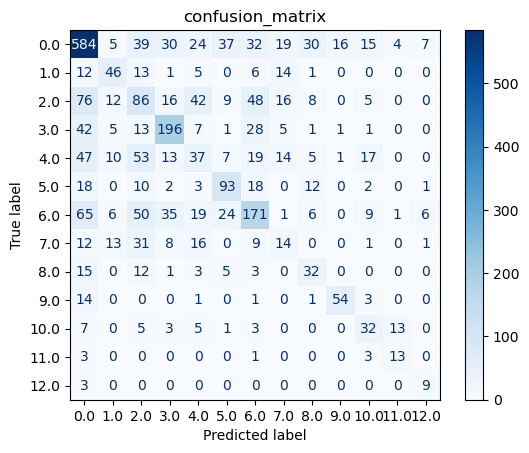

In [141]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
labels = list(set(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= labels)

disp.plot(cmap = plt.cm.Blues)
plt.title('confusion_matrix')
plt.show()


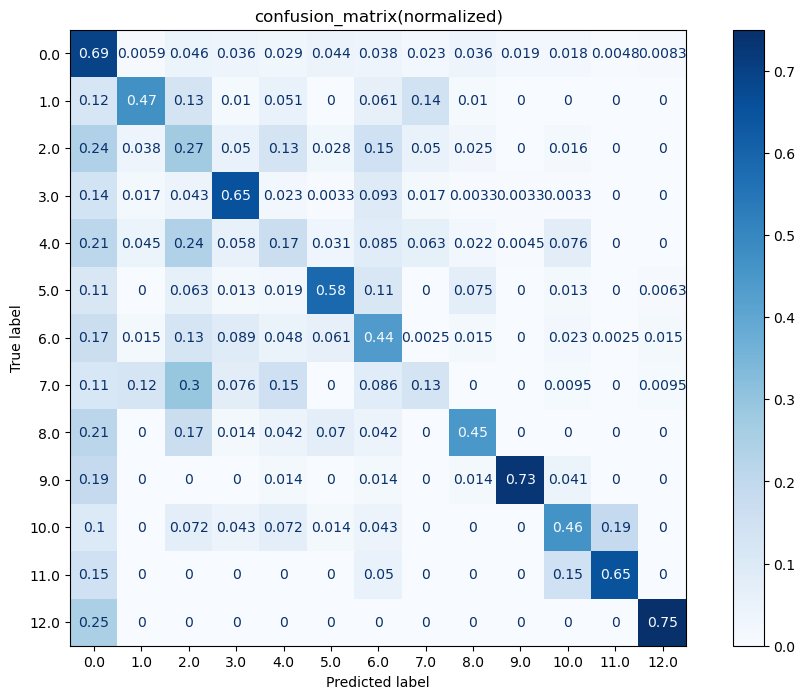

In [145]:
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

labels = list(set(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix= cm_normalized, display_labels= labels)

disp.plot(cmap = plt.cm.Blues, ax = plt.gca())
plt.title('confusion_matrix(normalized)')
plt.show()

- 잘 못맞추는 품종 (recall < 0.3)
    - 2: cabernet sauvignon
    - 4: merlot
    - 7: cabernet franc

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.69      0.67       842
         1.0       0.47      0.47      0.47        98
         2.0       0.28      0.27      0.27       318
         3.0       0.64      0.65      0.65       300
         4.0       0.23      0.17      0.19       223
         5.0       0.53      0.58      0.55       159
         6.0       0.50      0.44      0.47       393
         7.0       0.17      0.13      0.15       105
         8.0       0.33      0.45      0.38        71
         9.0       0.75      0.73      0.74        74
        10.0       0.36      0.46      0.41        69
        11.0       0.42      0.65      0.51        20
        12.0       0.38      0.75      0.50        12

    accuracy                           0.51      2684
   macro avg       0.44      0.50      0.46      2684
weighted avg       0.50      0.51      0.50      2684



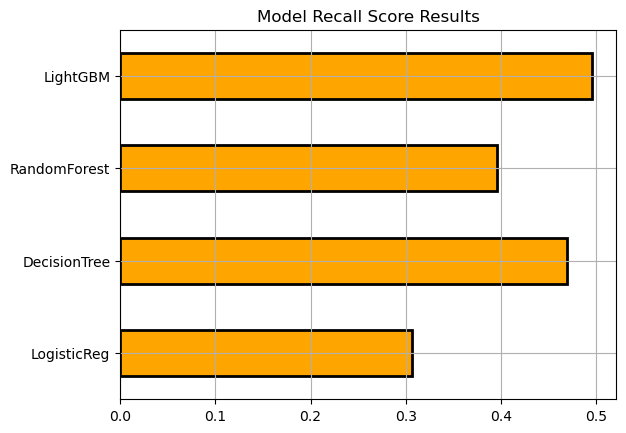

In [147]:
plt.title('Model Recall Score Results')
result['recall'].plot.barh(color = 'orange', edgecolor = 'k', linewidth = 2)
plt.grid()
plt.show()

In [148]:
from pandas import Series

feature_importance = lgbm.feature_importances_
series_feat_imp = Series(feature_importance, index = x.columns)
series_feat_imp

SHARE_x           29995
TEXTURE_USDA_x     1361
ROOT_DEPTH_x       1303
AWC_x             11573
COARSE             4161
                  ...  
KOPPEN_A              0
KOPPEN_B            206
KOPPEN_C            392
KOPPEN_D            230
KOPPEN_E            107
Length: 106, dtype: int32

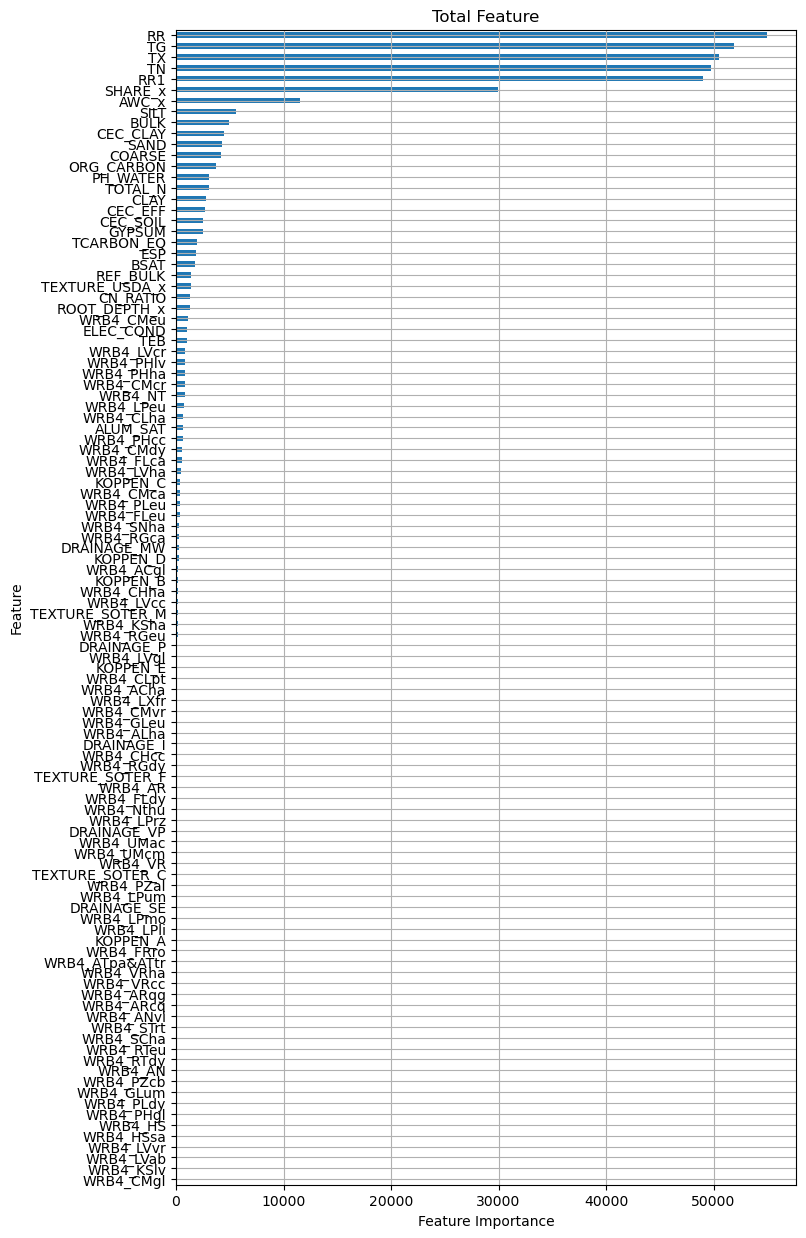

In [149]:
plt.figure(figsize = (8, 15))
series_feat_imp.sort_values(ascending= True).plot.barh()
plt.grid()
plt.title('Total Feature')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- 기후 & 와인 상관관계 분석했을 때에는 TN과 RR1이 비교적 강한 상관관계를 가지고 있는 것으로 나타났는데, Feature Importance 에서는 RR과 TG값이 중요하게 작용하는 것으로 나타남!
- 기후의 5개 Column 모두 Feature Importance Top 5를 차지하고 있음 -> 품종을 분류하는 데에 기후가 중요하게 작용하는 것으로 보인다.

### XGBoost, SVM

In [150]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.1 MB/s eta 0:00:00a 0:00:01


In [151]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

XGBoost 주요 하이퍼파라미터
1.	n_estimators: 부스팅 반복 횟수 또는 트리의 개수.
2.	learning_rate: 학습률로, 각 트리의 기여도를 조절합니다. 낮을수록 학습이 느리지만 더 잘 수렴합니다. (0.01 ~ 0.2 값 사용)
3.	max_depth: 각 트리의 최대 깊이. 깊을수록 모델이 복잡해질 수 있습니다.
4.	min_child_weight: 리프 노드가 가질 수 있는 최소 가중치 합입니다. 값이 클수록 과적합을 방지할 수 있습니다.
5.	gamma: 리프 노드를 추가로 분할하기 위해 필요한 최소 손실 감소 값. 값이 클수록 모델이 보수적으로 됩니다.
6.	subsample: 각 트리를 학습할 때 사용할 샘플의 비율. 값을 줄이면 과적합을 방지할 수 있습니다.
7.	colsample_bytree: 각 트리를 학습할 때 사용할 피처의 비율.
8.	objective: 학습 목표. 분류 문제에서는 ‘binary:logistic’ (이진 분류) 또는 ‘multi:softprob’ (다중 클래스 분류)을 사용합니다

In [162]:
xgb_clf = XGBClassifier(n_estimators = 1000, objective = 'multi:softmax', max_depth = 10, learning_rate = 0.2, random_state = 20, n_jobs = -1)

In [ ]:
# 너무 오래걸림... 코랩으로 다시 돌려봐야지
# param_grid = {
#     'learning_rate': [0.05, 0.1, 0.15, 0.2],
#     'max_depth': [3, 5, 7, 10],
#     'colsample_bytree':[0.6, 0.8, 0.9],
#     'colsample_bylevel': [0.6, 0.8, 0.9]
# }

# xgb_gridsearch = GridSearchCV(estimator= xgb_clf, param_grid= param_grid, scoring = 'f1_macro', cv = stkfold, n_jobs = -1)
# xgb_gridsearch.fit(X_train, y_train)

In [161]:
xgb_clf.fit(X_train, y_train)

pred_train = xgb_clf.predict(X_train)
pred_test = xgb_clf.predict(X_test)

def print_metrics(y, pred_y, title = 'None'):
    if title:
        print(title)
    
    print('Acc: ', accuracy_score(y,pred_y))
    print('Recall: ', recall_score(y,pred_y, average= 'macro', zero_division= 0))
    print('Precision: ', precision_score(y,pred_y, average= 'macro', zero_division= 0))
    print('f1: ', f1_score(y,pred_y, average= 'macro', zero_division= 0))


print_metrics(y_train, pred_train, 'XGB Train Score')
print_metrics(y_test, pred_test, 'XGB Test Score')

XGB Train Score
Acc:  0.6314759597465524
Recall:  0.6077474720720422
Precision:  0.5904484390549283
f1:  0.5927140209170265
XGB Test Score
Acc:  0.5093144560357675
Recall:  0.4919648773022039
Precision:  0.4562767141723431
f1:  0.4678559790789297


In [163]:
# learning rate 0.2로 지정
xgb_clf.fit(X_train, y_train)

pred_train = xgb_clf.predict(X_train)
pred_test = xgb_clf.predict(X_test)

def print_metrics(y, pred_y, title = 'None'):
    if title:
        print(title)
    
    print('Acc: ', accuracy_score(y,pred_y))
    print('Recall: ', recall_score(y,pred_y, average= 'macro', zero_division= 0))
    print('Precision: ', precision_score(y,pred_y, average= 'macro', zero_division= 0))
    print('f1: ', f1_score(y,pred_y, average= 'macro', zero_division= 0))


print_metrics(y_train, pred_train, 'XGB Train Score')
print_metrics(y_test, pred_test, 'XGB Test Score')

XGB Train Score
Acc:  0.6314759597465524
Recall:  0.6143356421403586
Precision:  0.5885288142864797
f1:  0.5929921667191919
XGB Test Score
Acc:  0.5108047690014903
Recall:  0.49760962775033685
Precision:  0.4510200536620216
f1:  0.46598017967655897


- 유의미한 차이를 보이지는 않는다

In [164]:
models = [lg, tree_gridsearch.best_estimator_, forest_gridsearch.best_estimator_, lgbm, xgb_clf]
models_name = ['LogisticReg', 'DecisionTree', 'RandomForest', 'LightGBM', 'XGBoost']

result = get_result_pd(models, models_name, X_train, y_train, X_test, y_test)
result

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.460134,0.370273,0.306552,0.312320,0.877992
DecisionTree,0.504844,0.483737,0.469792,0.463320,0.892126
RandomForest,0.529061,0.439494,0.395684,0.404359,0.922800
LightGBM,0.509314,0.439313,0.496171,0.458950,0.916430
XGBoost,0.510805,0.451020,0.497610,0.465980,0.916488


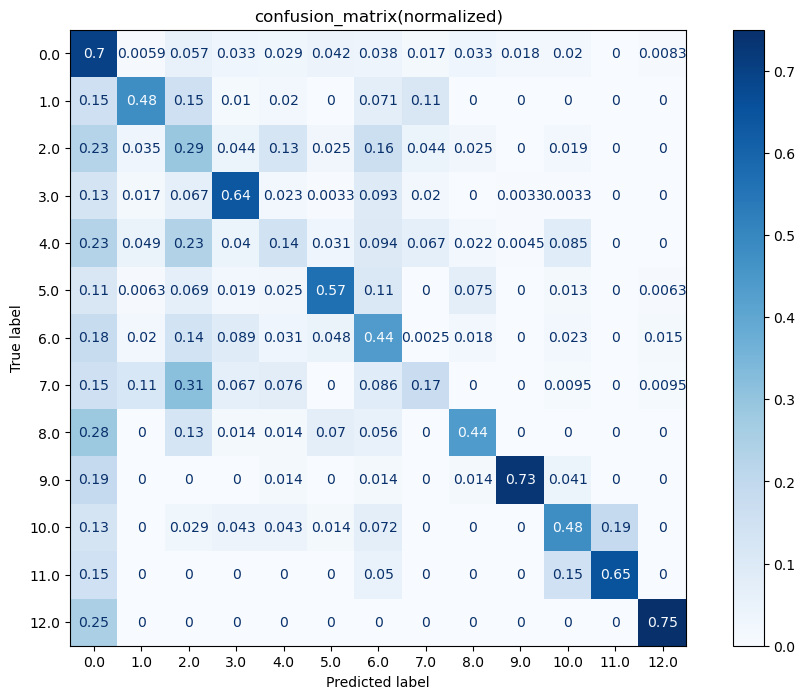

In [165]:
plt.figure(figsize = (12, 8))
cm = confusion_matrix(y_test, pred_test)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

labels = list(set(y_train.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix= cm_normalized, display_labels= labels)

disp.plot(cmap = plt.cm.Blues, ax = plt.gca())
plt.title('confusion_matrix(normalized)')
plt.show()

In [166]:
feature_importance = xgb_clf.feature_importances_
series_feat_imp = Series(feature_importance, index = x.columns)
series_feat_imp

SHARE_x           0.001918
TEXTURE_USDA_x    0.001671
ROOT_DEPTH_x      0.004057
AWC_x             0.002004
COARSE            0.001964
                    ...   
KOPPEN_A          0.000030
KOPPEN_B          0.001964
KOPPEN_C          0.003530
KOPPEN_D          0.001134
KOPPEN_E          0.001808
Length: 106, dtype: float32

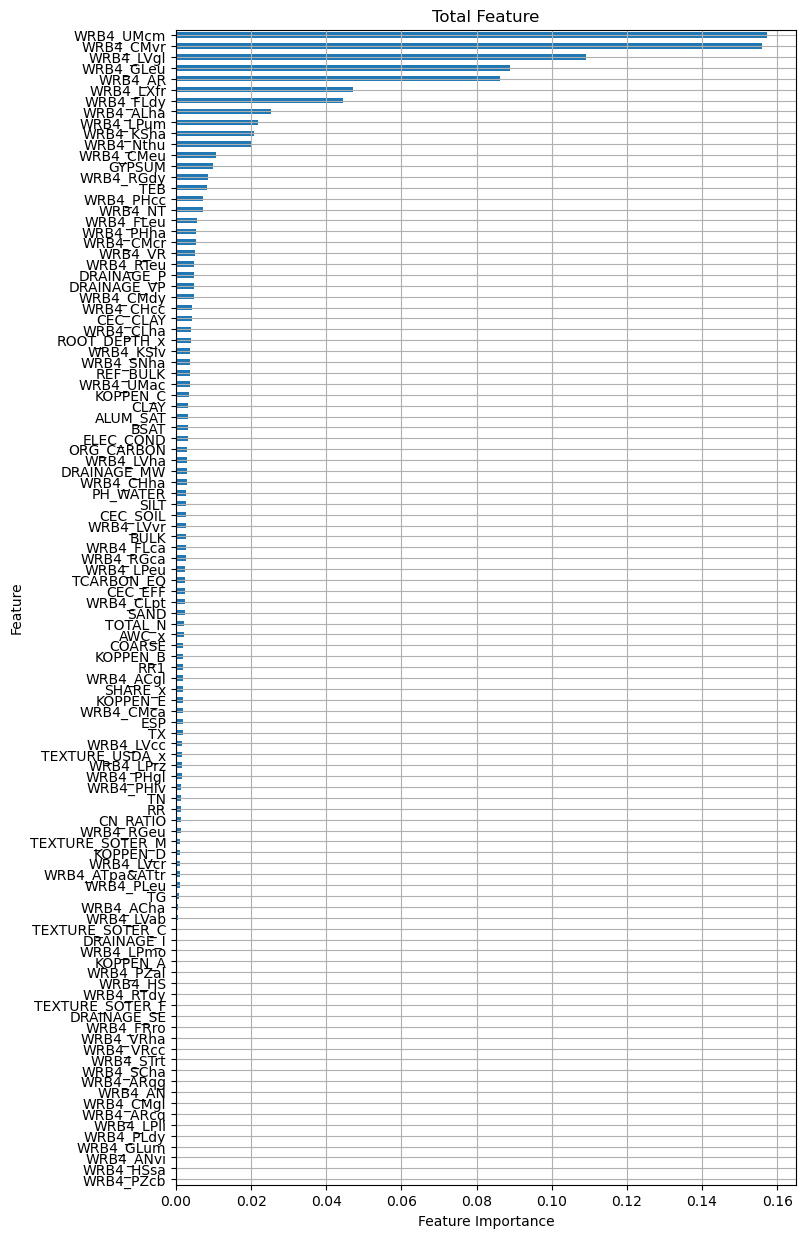

In [167]:
plt.figure(figsize = (8, 15))
series_feat_imp.sort_values(ascending= True).plot.barh()
plt.grid()
plt.title('Total Feature')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- XGBoost에서는 Feature Importance에서 기후데이터가 상위를 차지하고 있지 않음!
- 토양타입 WRB4가 Feature Importance Top12까지 주요 지표로 활용된 것으로 나타남

<메모>
- 데이터가 imbalanced된 상태에서는 f1 score를 보는게 유의미하다

- 하위 품종 5개 삭제하고 모델 돌려보는 것도 의미있을 듯
- 그런데 생각보다 12의 값은 데이터가 부족한데에 비해 예측을 잘 하는 것으로 보임...
- 데이터의 개수가 아닌 그 속 안에서 구분 못하는 이유를 찾아야한다..!
- 기후데이터의 5가지가 다 중요한 지표로 사용되었는데, 각 요소마다 상관관계가 높아 TG, TX, RR 만 사용해도 괜찮을 듯 하다

Next Step
- XGBoost, SVM
- 최종 선정 모델 활용하여 미래 포도품종 예측하기
- 미래 포도품종 변화 살펴보기

In [168]:
# predict할 데이터 프레임 불러오기

df_predict = pd.read_csv('./Wine Data/wine_total_data_2041_2070.csv', index_col= 0)
df_predict.head()

,Longitude,Latitude,Soil Mapping Unit,Continent,Country,Region Lv1,Grape_Variety,SHARE_x,WRB4_x,KOPPEN,...,year,lat,lon,TG,TN,TX,RR,RR1,lat_int,lon_int
0,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,2045,-40.75,-63.75,289.85718,279.44308,304.04224,22.983089,2.190476,-40,-63
1,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,2050,-40.75,-63.75,291.11362,277.72110,306.59690,9.382288,1.571429,-40,-63
2,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,2055,-40.75,-63.75,291.88892,277.81348,308.10320,11.660726,1.500000,-40,-63
3,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,2060,-40.75,-63.75,291.33844,279.31155,307.31146,7.939281,1.000000,-40,-63
4,-63.358333,-40.766667,12245,Americas,Argentina,Río Negro Province,malbec,60,FLeu,B,...,2065,-40.75,-63.75,291.48007,281.04874,305.97473,12.772080,1.380952,-40,-63


In [169]:
# 현재의 온도는 K 기준으로 되어 있어서 섭씨로 변경해줌
df_predict['TG'] = df_predict['TG'] - 273
df_predict['TN'] = df_predict['TN'] - 273
df_predict['TX'] = df_predict['TX'] - 273

In [171]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82932 entries, 0 to 82931
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longitude          82932 non-null  float64
 1   Latitude           82932 non-null  float64
 2   Soil Mapping Unit  82932 non-null  int64  
 3   Continent          82932 non-null  object 
 4   Country            82932 non-null  object 
 5   Region Lv1         82560 non-null  object 
 6   Grape_Variety      82812 non-null  object 
 7   SHARE_x            82932 non-null  int64  
 8   WRB4_x             82932 non-null  object 
 9   KOPPEN             82932 non-null  object 
 10  TEXTURE_USDA_x     80496 non-null  float64
 11  REF_BULK_DENSITY   80496 non-null  float64
 12  BULK_DENSITY       82932 non-null  float64
 13  DRAINAGE_x         80496 non-null  object 
 14  ROOT_DEPTH_x       82932 non-null  int64  
 15  AWC_x              82932 non-null  int64  
 16  ROOTS_x            37614 no

In [172]:
drop_cols = ['Longitude', 'Latitude', 'Region Lv1', 'Continent', 'Country', 'LatRound', 'LngRound', 'LatInt', 'LngInt', 'lat', 'lon', 'lat_int', 'lon_int', 'Soil Mapping Unit']
df_predict = df_predict.drop(columns = drop_cols)


In [175]:
#df_predict.drop(columns = ['Top12_Grape', 'year'], inplace = True)
df_predict.drop('SEQUENCE', axis = 1, inplace= True)
df_predict.drop('HWSD2_SMU_ID_y',axis=1,inplace=True)
df_predict.drop(['REF_BULK_DENSITY','BULK_DENSITY'],axis=1,inplace=True) 
df_predict.drop(['SHARE_y', 'ROOT_DEPTH_y', 'AWC_y'],axis=1,inplace=True) 
df_predict.drop(['WRB4_y','DRAINAGE_y'],axis=1,inplace=True)
df_predict.drop('TEXTURE_USDA_y',axis=1,inplace=True)

df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82932 entries, 0 to 82931
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Grape_Variety   82812 non-null  object 
 1   SHARE_x         82932 non-null  int64  
 2   WRB4_x          82932 non-null  object 
 3   KOPPEN          82932 non-null  object 
 4   TEXTURE_USDA_x  80496 non-null  float64
 5   DRAINAGE_x      80496 non-null  object 
 6   ROOT_DEPTH_x    82932 non-null  int64  
 7   AWC_x           82932 non-null  int64  
 8   ROOTS_x         37614 non-null  float64
 9   IL_x            37614 non-null  float64
 10  ROOTS_y         37614 non-null  float64
 11  IL_y            37614 non-null  float64
 12  SWR             31110 non-null  float64
 13  COARSE          82932 non-null  int64  
 14  SAND            82932 non-null  int64  
 15  SILT            82932 non-null  int64  
 16  CLAY            82932 non-null  int64  
 17  TEXTURE_SOTER   82932 non-null  obje

In [176]:
grape_dic = {
    'malbec' : 1,
    'cabernet sauvignon' : 2,
    'pinot noir' : 3 ,
    'merlot' : 4,
    'grenache' : 5,
    'syrah' : 6,
    'cabernet franc' :7,
    'tempranillo' : 8,
    'nebbiolo' : 9,
    'sangiovese' : 10,
    'montepulciano' : 11,
    'zinfandel' : 12
}

df_predict['Grape_Variety']=df_predict.loc[df_predict['Top12_Grape'] == 1]['Grape_Variety'].map(grape_dic)
df_predict.loc[df_predict['Grape_Variety'].isnull(),'Grape_Variety'] = 0
df_predict['Grape_Variety'].value_counts()

Grape_Variety
0.0     29370
6.0     11370
2.0      9300
3.0      8910
4.0      6666
5.0      3504
7.0      3318
1.0      2640
10.0     2622
9.0      2328
8.0      1836
11.0      648
12.0      420
Name: count, dtype: int64

In [177]:
df_predict = pd.get_dummies(df_predict, columns = ['TEXTURE_SOTER'], prefix = 'TEXTURE_SOTER', dtype = int)
df_predict = pd.get_dummies(df_predict, columns=['WRB4_x'], prefix='WRB4',dtype=int)
df_predict = pd.get_dummies(df_predict, columns=['DRAINAGE_x'], prefix='DRAINAGE',dtype=int)
df_predict = pd.get_dummies(df_predict, columns=['KOPPEN'], prefix='KOPPEN',dtype=int)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13416 entries, 0 to 13821
Columns: 107 entries, target to KOPPEN_E
dtypes: float64(14), int64(93)
memory usage: 11.1 MB
